# Selfish Trajectory Optimization

In [70]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath('..'))
from cav_game.dynamics.car import DoubleIntegratorDynamics
from cav_game.maneuvers.selfish import SelfishManeuver

### 1. Define Parameters

Ipopt 3.14.10: acceptable_tol=1e-08
acceptable_obj_change_tol=1e-08
max_iter=10000
print_level=3


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:     1805
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      602
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1503
Total number of inequality constraints...............:      301
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
   

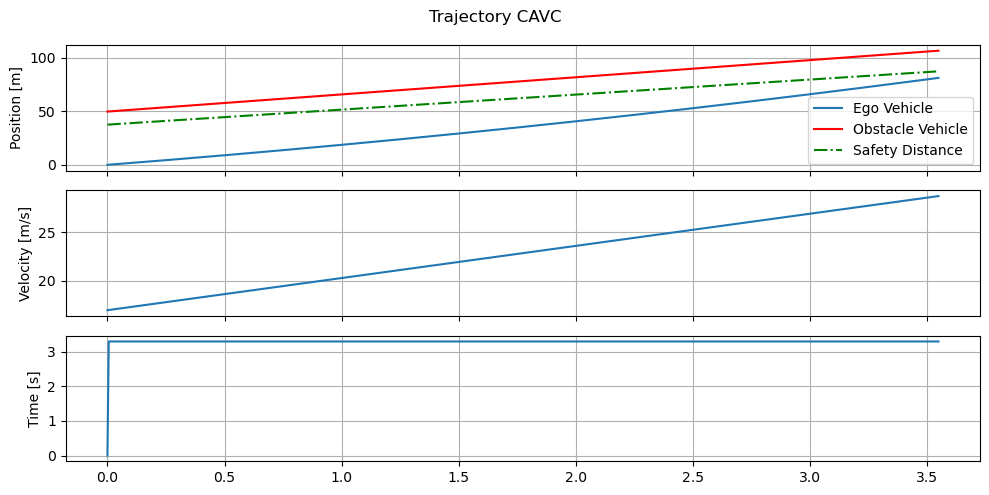

In [72]:

# Vehicle i initial conditions
x0 = 0       # Vehicle i initial x position [m]
v0 = 17      # Vehicle i initial velocity [m/s]
X0 = np.array([x0, v0])
# Obstacle i initial conditions
x0_obst = 14; # Obstacle i initial x position [m]
v0_obst = 16;  # Obstacle i initial velocity [m/s]
X0_obst = np.array([x0_obst, v0_obst])
# Obstacle location descriptor
obstacles = {"front": X0_obst}
# Construct optimization parameters
maneuver_params = {"cav_type":"CAVC","alpha_time": 0.2, "alpha_control":0.1, "alpha_speed":0.7, "n":100}
# Construct vehicle model
veh_params = {}
cav_model = DoubleIntegratorDynamics(veh_params)
# Construct maneuver
long_maneuver = SelfishManeuver(cav_model, x0 =  X0, x0_obst=obstacles, params = maneuver_params)
traj = long_maneuver.compute_longitudinal_trajectory(obstacle=True)
